# Computer Architecture Assignment 1 - Multiprocessing
## Student Number: 20204693

- This notebook requires two imported Python files, one for each part (part1, part2).

In [23]:
# Import modules
from subprocess import Popen, PIPE, STDOUT
from IPython.core.magic import register_line_magic
import math
import multiprocessing
import time
from multiprocessing import get_context
from multiprocessing import Pool
from functools import partial
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from concurrent.futures import ProcessPoolExecutor

from part1 import prime_func_1
from part1 import prime_func_2
from part1 import prime_func_3
from part1 import primes_list_1

from part2 import randomSum_func_1
from part2 import randomSum_func_2
from part2 import randomSum_func_3
from part2 import randomSum_list_1

In [14]:
# Function to run multiprocessing files' live terminal outputs inside Jupyter notebook
@register_line_magic
def runrealcmd(command):
    process = Popen(command, stdout=PIPE, shell=True, stderr=STDOUT, close_fds=True)
    for line in iter(process.stdout.readline,b''):
        print(line.rstrip().decode('utf-8'))
    process.stdout.close()
    process.wait()

In [15]:
# Run part1 inline
%runrealcmd python part1.py

[15485867, 32452843, 32452867, 49979687, 49979693, 67867967, 67867979, 86028121, 86028157, 104395301, 104395303, 122949823, 122949829, 141650939, 141650963, 160481183, 160481219, 179424673] 1
15485867 is a prime number
Time: 1.7093069553375244
Task: <SpawnProcess name='SpawnPoolWorker-1' parent=5028 started daemon>

32452843 is a prime number
Time: 5.135692358016968
Task: <SpawnProcess name='SpawnPoolWorker-1' parent=5028 started daemon>

32452867 is a prime number
Time: 10.370309829711914
Task: <SpawnProcess name='SpawnPoolWorker-1' parent=5028 started daemon>

49979687 is a prime number
Time: 15.551522016525269
Task: <SpawnProcess name='SpawnPoolWorker-1' parent=5028 started daemon>

49979693 is a prime number
Time: 20.705731630325317
Task: <SpawnProcess name='SpawnPoolWorker-1' parent=5028 started daemon>

67867967 is a prime number
Time: 27.857139587402344
Task: <SpawnProcess name='SpawnPoolWorker-1' parent=5028 started daemon>

67867979 is a prime number
Time: 34.814526319503784
T

In [24]:
# Multiprocessing function - uses the Pool class rather than the process class
def pool_process(f, data, pool_size = multiprocessing.cpu_count()):
    if __name__ == '__main__':
        with multiprocessing.get_context('spawn').Pool(processes=pool_size) as pool:
            tpl = time.time()
            print(data, pool_size)
            
            result = pool.map(partial(f, b=tpl), data)
            pool.close()
            pool.join()
            print("Results", result)
            print("Overall Time:", int(time.time() - tpl))
            print("______________________________________________________")
            return result

In [25]:
# Summary results for multiprocessing
processor1 = pool_process(prime_func_1, primes_list_1, 1)

processor2 = pool_process(prime_func_1, primes_list_1, 2)

processor3 = pool_process(prime_func_1, primes_list_1, 3)

processor4 = pool_process(prime_func_1, primes_list_1, 4)

[15485867, 32452843, 32452867, 49979687, 49979693, 67867967, 67867979, 86028121, 86028157, 104395301, 104395303, 122949823, 122949829, 141650939, 141650963, 160481183, 160481219, 179424673] 1
Results [2.2532644271850586, 5.9513771533966064, 10.000228643417358, 16.28039813041687, 21.489293575286865, 28.421712636947632, 35.468863010406494, 44.264559745788574, 53.18752670288086, 63.94655179977417, 74.67911195755005, 87.167635679245, 99.65623474121094, 114.16622614860535, 128.69102144241333, 144.92750549316406, 161.35477662086487, 179.8839464187622]
Overall Time: 179
______________________________________________________
[15485867, 32452843, 32452867, 49979687, 49979693, 67867967, 67867979, 86028121, 86028157, 104395301, 104395303, 122949823, 122949829, 141650939, 141650963, 160481183, 160481219, 179424673] 2
Results [2.1083602905273438, 6.165510892868042, 10.186756610870361, 6.1724913120269775, 12.303354501724243, 21.010529041290283, 19.0208523273468, 29.703266620635986, 40.59724187850952

In [26]:
# Create pandas dataframe with all results
d = {'1 processor': processor1, '2 processors': processor2, '3 processors': processor3, '4 processors': processor4 }
df = pd.DataFrame(data=d)
df

,1 processor,2 processors,3 processors,4 processors
0,2.253264,2.108360,2.574652,3.342004
1,5.951377,6.165511,7.399117,9.901431
2,10.000229,10.186757,5.160465,6.711556
3,16.280398,6.172491,12.668798,16.807801
4,21.489294,12.303355,7.955296,10.342404
5,28.421713,21.010529,18.212339,24.093081
6,35.468863,19.020852,17.694206,13.966182
7,44.264560,29.703267,30.954697,31.543580
8,53.187527,40.597242,25.770560,27.262851
9,63.946552,33.902599,41.804676,48.311966


<AxesSubplot:>

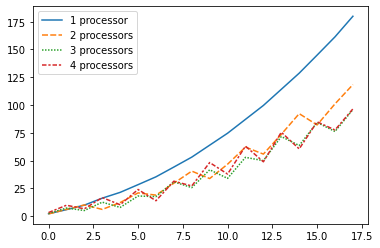

In [27]:
# Use dataframe to make line plot for analysis
sns.lineplot(data=df)

In [3]:
# Create list of the first 1000 prime numbers, starting from 100000
num = 100000
primes_list_2 = []
while len(primes_list_2) < 1000:
        for j in range(2,num):
            if (num % j) == 0:
                break
        else:
            primes_list_2.append(num)
        num += 1

In [9]:
# Use new list as multiprocessing input (smaller primes, but larger list than before)
processor1 = pool_process(prime_func_1, primes_list_2, 1)

processor2 = pool_process(prime_func_1, primes_list_2, 2)

processor3 = pool_process(prime_func_1, primes_list_2, 3)

processor4 = pool_process(prime_func_1, primes_list_2, 4)

10921, 110923, 110927, 110933, 110939, 110947, 110951, 110969, 110977, 110989, 111029, 111031, 111043, 111049, 111053, 111091, 111103, 111109, 111119, 111121, 111127, 111143, 111149, 111187, 111191, 111211, 111217, 111227, 111229, 111253, 111263, 111269, 111271, 111301, 111317, 111323, 111337, 111341, 111347, 111373, 111409, 111427, 111431, 111439, 111443, 111467, 111487, 111491, 111493, 111497, 111509, 111521, 111533, 111539, 111577, 111581, 111593, 111599, 111611, 111623, 111637, 111641, 111653, 111659, 111667, 111697] 4
Results [0.17951631546020508, 0.20445013046264648, 0.22639131546020508, 0.2603006362915039, 0.28922343254089355, 0.3091695308685303, 0.35205745697021484, 0.37200117111206055, 0.3979332447052002, 0.42186760902404785, 0.4468040466308594, 0.4866950511932373, 0.5086357593536377, 0.5405504703521729, 0.5624949932098389, 0.5834379196166992, 0.6043806076049805, 0.6233289241790771, 0.6482625007629395, 0.6712007522583008, 0.7041134834289551, 0.7230637073516846, 0.7629554271697

In [10]:
# Create pandas dataframe of result
d = {'1 processor': processor1, '2 processors': processor2, '3 processors': processor3, '4 processors': processor4 }
df = pd.DataFrame(data=d)
df

,1 processor,2 processors,3 processors,4 processors
0,0.155611,0.148599,0.172548,0.179516
1,0.166582,0.168546,0.191487,0.204450
2,0.177521,0.184505,0.211432,0.226391
3,0.188522,0.208441,0.237363,0.260301
4,0.200496,0.231379,0.257309,0.289223
...,...,...,...,...
995,12.354943,8.902181,7.615623,7.208712
996,12.366911,8.925121,7.636569,7.230653
997,12.378884,8.936090,7.658509,7.258579
998,12.392842,8.947061,7.684439,7.282514


<AxesSubplot:>

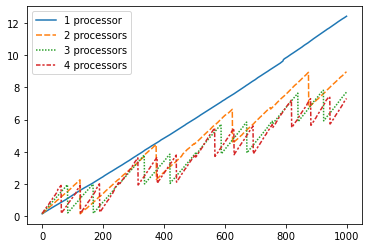

In [11]:
# Use dataframe to make line plot for analysis
sns.lineplot(data=df)

In [2]:
# Function to create a horizontal bar chart in order to map overlapping processes
def plotResults(results, title, label):
    start,stop = np.array(results).T
    plt.barh(range(len(start)),stop-start,left=start, alpha=0.5, label = label)
    plt.grid(axis='x')
    plt.ylabel("Tasks")
    plt.xlabel("Seconds")
    plt.title(title)
    plt.legend()
    return stop[-1]-start[0]

In [2]:
# New multiprocessing function to get start times for each task
def multiprocessing(func, args, workers):
    begin_time = time.time()
    with ProcessPoolExecutor(max_workers=workers) as executor:
        res = executor.map(func, args, [begin_time for i in range(len(args))])
    return list(res)

170.28111743927002

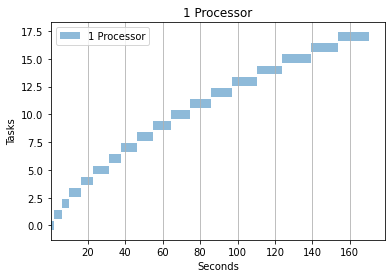

In [14]:
# Make a horizontal bar chart for each test
plotResults(multiprocessing(prime_func_2, primes_list_1, 1), "1 Processor", "1 Processor")

114.2190043926239

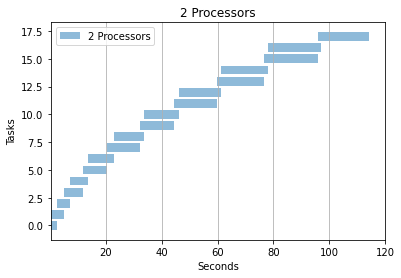

In [7]:
plotResults(multiprocessing(prime_func_2, primes_list_1, 2), "2 Processors", "2 Processors")

97.14450669288635

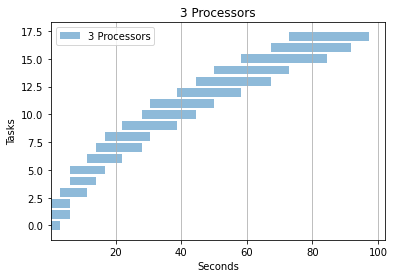

In [6]:
plotResults(multiprocessing(prime_func_2, primes_list_1, 3), "3 Processors", "3 Processors")

94.7644670009613

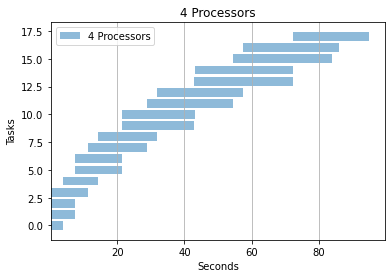

In [5]:
plotResults(multiprocessing(prime_func_2, primes_list_1, 4), "4 Processors", "4 Processors")

95.34017491340637

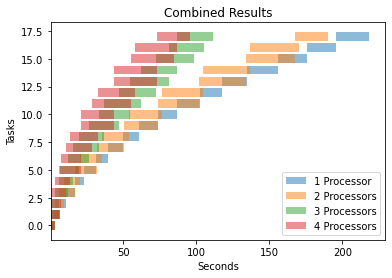

In [4]:
# Summary horizontal bar chart
plotResults(multiprocessing(prime_func_2, primes_list_1, 1), "", "1 Processor")
plotResults(multiprocessing(prime_func_2, primes_list_1, 2), "", "2 Processors")
plotResults(multiprocessing(prime_func_2, primes_list_1, 3), "", "3 Processors")
plotResults(multiprocessing(prime_func_2, primes_list_1, 4), "Combined Results", "4 Processors")

In [14]:
# Get running time for each individual task
processor1 = multiprocessing(prime_func_3, primes_list_2, 1)

processor2 = multiprocessing(prime_func_3, primes_list_2, 2)

processor3 = multiprocessing(prime_func_3, primes_list_2, 3)

processor4 = multiprocessing(prime_func_3, primes_list_2, 4)

In [15]:
# Get mean of a list of integers
def mean(intList):
    return sum(intList) / len(intList)

In [16]:
# Print mean task running time
print("""
1 processor: {}
2 processors: {}
3 processors: {}
4 processors: {}
""".format(mean(processor1), mean(processor2), mean(processor3), mean(processor4)))


1 processor: 0.011340974807739258
2 processors: 0.014141311407089234
3 processors: 0.01757522702217102
4 processors: 0.02300222396850586



In [17]:
# Print standard deviation of task running times
print("""
1 processor: {}
2 processors: {}
3 processors: {}
4 processors: {}
""".format(np.std(processor1), np.std(processor2), np.std(processor3), np.std(processor4)))


1 processor: 0.002055376903935565
2 processors: 0.0029571070401318922
3 processors: 0.003521751640716132
4 processors: 0.0023941592110699864



In [19]:
# Run inline for part 2
%runrealcmd python part2.py

[1000000, 1000001, 1000002, 1000003, 1000004, 1000005, 1000006, 1000007, 1000008, 1000009, 1000010, 1000011, 1000012, 1000013, 1000014, 1000015, 1000016, 1000017, 1000018, 1000019] 1
15002833626 is the sum of a random list of 1000000 numbers in the range of 10000-20000
Time: 1.644599437713623
Task: <SpawnProcess name='SpawnPoolWorker-1' parent=14880 started daemon>

15001167593 is the sum of a random list of 1000001 numbers in the range of 10000-20000
Time: 3.2173924446105957
Task: <SpawnProcess name='SpawnPoolWorker-1' parent=14880 started daemon>

14997868577 is the sum of a random list of 1000002 numbers in the range of 10000-20000
Time: 4.7293479442596436
Task: <SpawnProcess name='SpawnPoolWorker-1' parent=14880 started daemon>

15003965256 is the sum of a random list of 1000003 numbers in the range of 10000-20000
Time: 6.287214994430542
Task: <SpawnProcess name='SpawnPoolWorker-1' parent=14880 started daemon>

14997833953 is the sum of a random list of 1000004 numbers in the range

In [23]:
# Get summary results for part 2
processor1 = pool_process(randomSum_func_1, randomSum_list_1, 1)

processor2 = pool_process(randomSum_func_1, randomSum_list_1, 2)

processor3 = pool_process(randomSum_func_1, randomSum_list_1, 3)

processor4 = pool_process(randomSum_func_1, randomSum_list_1, 4)

[1000000, 1000001, 1000002, 1000003, 1000004, 1000005, 1000006, 1000007, 1000008, 1000009, 1000010, 1000011, 1000012, 1000013, 1000014, 1000015, 1000016, 1000017, 1000018, 1000019] 1
Results [1.6214897632598877, 3.3825032711029053, 5.103341579437256, 6.630200624465942, 8.150007009506226, 9.717225074768066, 11.24296760559082, 12.79227900505066, 14.337290525436401, 15.898330211639404, 17.468007802963257, 19.033780574798584, 20.56945538520813, 22.11892604827881, 23.684220552444458, 25.22890067100525, 26.750067949295044, 28.291350841522217, 29.807976484298706, 31.339210033416748]
Overall Time: 31
______________________________________________________
[1000000, 1000001, 1000002, 1000003, 1000004, 1000005, 1000006, 1000007, 1000008, 1000009, 1000010, 1000011, 1000012, 1000013, 1000014, 1000015, 1000016, 1000017, 1000018, 1000019] 2
Results [1.9686172008514404, 3.9463255405426025, 5.727143287658691, 1.9377000331878662, 3.9153683185577393, 5.688211917877197, 7.381967782974243, 8.96661686897277

In [24]:
# Make Pandas dataframe with results
d = {'1 processor': processor1, '2 processors': processor2, '3 processors': processor3, '4 processors': processor4 }
df = pd.DataFrame(data=d)
df

,1 processor,2 processors,3 processors,4 processors
0,1.668791,1.792201,2.365671,2.985013
1,3.215676,3.515590,4.728349,5.858328
2,4.674536,5.244962,2.371654,2.927168
3,6.116463,1.822121,4.751288,5.789512
4,7.570281,3.517587,2.474380,3.010945
5,9.010518,5.276878,4.771237,5.844364
6,10.499072,7.023207,6.996282,3.063802
7,12.028594,8.780504,9.326050,5.876279
8,13.485489,10.581685,7.037171,8.650856
9,14.942335,7.065093,9.238283,11.482280


<AxesSubplot:>

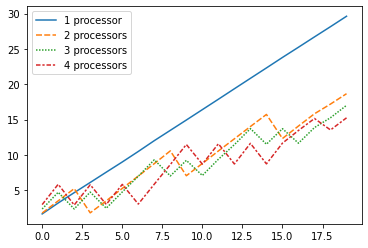

In [25]:
# Make line plot of multiprocessing results
sns.lineplot(data=df)

32.458009481430054

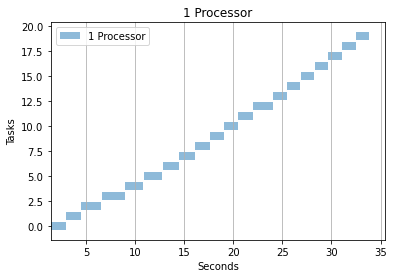

In [30]:
# Make a horizontal bar chart for each test
plotResults(multiprocessing(randomSum_func_2, randomSum_list_1, 1), "1 Processor", "1 Processor")

19.772104263305664

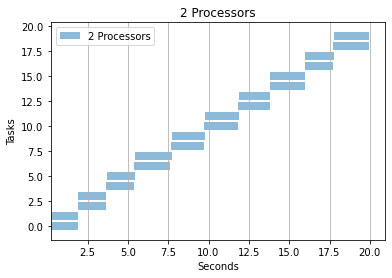

In [31]:
plotResults(multiprocessing(randomSum_func_2, randomSum_list_1, 2), "2 Processors", "2 Processors")

14.719643354415894

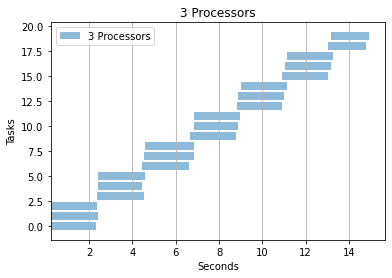

In [8]:
plotResults(multiprocessing(randomSum_func_2, randomSum_list_1, 3), "3 Processors", "3 Processors")

14.2972891330719

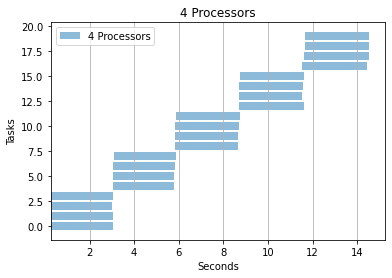

In [9]:
plotResults(multiprocessing(randomSum_func_2, randomSum_list_1, 4), "4 Processors", "4 Processors")

14.167554140090942

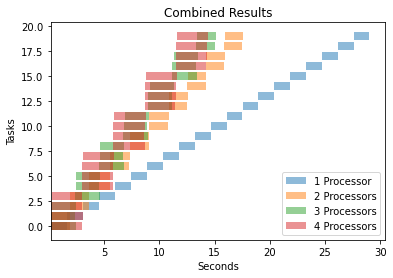

In [10]:
# Summary horizontal bar chart for part 2
plotResults(multiprocessing(randomSum_func_2, randomSum_list_1, 1), "", "1 Processor")
plotResults(multiprocessing(randomSum_func_2, randomSum_list_1, 2), "", "2 Processors")
plotResults(multiprocessing(randomSum_func_2, randomSum_list_1, 3), "", "3 Processors")
plotResults(multiprocessing(randomSum_func_2, randomSum_list_1, 4), "Combined Results", "4 Processors")

In [5]:
# Get individual task running times
processor1 = multiprocessing(randomSum_func_3, randomSum_list_1, 1)

processor2 = multiprocessing(randomSum_func_3, randomSum_list_1, 2)

processor3 = multiprocessing(randomSum_func_3, randomSum_list_1, 3)

processor4 = multiprocessing(randomSum_func_3, randomSum_list_1, 4)

In [15]:
# Print mean task running time
print("""
1 processor: {}
2 processors: {}
3 processors: {}
4 processors: {}
""".format(mean(processor1), mean(processor2), mean(processor3), mean(processor4)))


1 processor: 1.5652485251426698
2 processors: 1.7091017007827758
3 processors: 2.449101448059082
4 processors: 2.8863648056983946



In [8]:
# Print standard deviation of task running time
print("""
1 processor: {}
2 processors: {}
3 processors: {}
4 processors: {}
""".format(np.std(processor1), np.std(processor2), np.std(processor3), np.std(processor4)))


1 processor: 0.002830872458942802
2 processors: 0.0033015047117436022
3 processors: 0.00576862842376454
4 processors: 0.0069377118012996265

